# Python Reader for the Titan UVIS Library

The code below allow to open and read the main elements of the Titan UVIS Library FITS files. Examples are given to obtain the data general information, to retrieve specific parameter values, to graph a spectrum and to display a detector image.

## Importing the libraries and opening the data

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits


hdulist = fits.open('/Users/eroyer/Desktop/cassini-uvis_titan-library/data_derived/FUV/2011/FUV2011_109_07_44_36_UVIS_147TI_EUVFUV001_PRIME_combined.fits')

In [2]:
# Printing the general information about the data file
# This displays the name of each HDU
hdulist.info()

Filename: /Users/eroyer/Desktop/cassini-uvis_titan-library/data_derived/FUV/2011/FUV2011_109_07_44_36_UVIS_147TI_EUVFUV001_PRIME_combined.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  CAL           1 BinTableHDU     13   1R x 1C   [65536E]   
  2  CONFIG        1 BinTableHDU     47   1R x 10C   [K, J, J, J, J, J, J, J, E, E]   
  3  DATA          1 BinTableHDU     19   81R x 2C   [196608E, 196608E]   
  4  DETECTOR_IMG_FUV    1 BinTableHDU     37   81R x 7C   [64D, 64D, 64D, 64D, 64D, 64D, 64D]   
  5  FOV_GEOM      1 BinTableHDU     57   81R x 11C   [960D, 960D, 960D, 960D, 960D, 960D, 192D, 192D, 192D, 192D, 192D]   
  6  KERNELS       1 TableHDU        37   3R x 7C   [A12, A12, A29, A17, A23, A25, A15]   
  7  SC_GEOM       1 BinTableHDU     53   81R x 11C   [3D, 3D, 3D, 3D, 3D, 3D, 3D, 3D, 3D, 3D, 3D]   
  8  TARGET_GEOM    1 BinTableHDU     45   81R x 9C   [3D, 3D, 3D, 3D, 3D, 192D, 192D, 192D, 3D]   
  9

In [3]:
# To print the Primary header
hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FILENAME= 'FUV2011_109_07_44_36_UVIS_147TI_EUVFUV001_PRIME_combined.fits' / nan 
PROD_ID = 'FUV2011_109_07_44'  / PDS product ID                                 
DATE    = '2023-02-04T00:03:03.509936' / date this file was written (yyyy-mm-dd)
MISSION = 'Cassini '           / Mission name = Cassini                         
INSTRUME= 'ULTRAVIOLET IMAGING SPECTROGRAPH' / instrument used to acquire data =
VERSION =                  1.0 / File version number                            
OBS_ID  =               136337 / Numerical Observation ID                       
MPHASE  = 'XXM     '           / Mission Phase (Ground, Prime,Solstice, Equinox)
TRGTNAME= 'TITAN   '        

## Retrieveing parameter values

In [4]:
# the two functions below allow to 
# - display the names of each parameter with an HDU with col_name() and,
# - return the value of the parameter with fits_data()

def col_name(hdulistNum):
    names = hdulist[hdulistNum].data.columns
    return names

def fits_data(hdulistNum, col_name):
    table = hdulist[hdulistNum]
    value = table.data.field(col_name).squeeze()
    return value

In [5]:
# Example to retrieve the column names of HDU #9 (TIME)
# The TIME HDu has two variables, called TIME_ET and TIME_UTC
col_name(9)

ColDefs(
    name = 'TIME_ET'; format = '3D'; dim = '(3)'
    name = 'TIME_UTC'; format = '78A'; dim = '(26,3)'
)

In [6]:
# printing the value of TIME_ET
time_et = fits_data(9,'time_et')
print('shape of time_et:' , time_et.shape)
print('First row of the time_et array:' , time_et[0])

shape of time_et: (81, 3)
First row of the time_et array: [3.5647110e+08 3.5647098e+08 3.5647122e+08]


In [7]:
# Example to retrieve the column names of HDU #2 (CONFIG)
col_name(2)

ColDefs(
    name = 'OBS_SECONDS'; format = 'K'; null = 999999
    name = 'OBS_TICKS'; format = 'J'; null = 999999
    name = 'IMG_XMIN'; format = 'J'; null = 999999
    name = 'IMG_XMAX'; format = 'J'; null = 999999
    name = 'IMG_YMIN'; format = 'J'; null = 999999
    name = 'IMG_YMAX'; format = 'J'; null = 999999
    name = 'IMG_XBIN'; format = 'J'; null = 999999
    name = 'IMG_YBIN'; format = 'J'; null = 999999
    name = 'INT_TIME'; format = 'E'
    name = 'NUMBER_OF_SAMPLES'; format = 'E'
)

In [8]:
# Example to retrieve the values of the OBS_SECONDS, IMG_XBIN and NUMBER_OF_SAMPLES parameters
print(fits_data(2,'obs_seconds'))
print(fits_data(2,'IMG_XBIN'))
print(fits_data(2,'number_of_samples'))

1681893179
1
81.0


In [9]:
# printing the array sizes of the rawcounts and uvis_calibrated data parameters
print(fits_data(3,'rawcounts').shape)
print(fits_data(3,'uvis_calibrated').shape)

(81, 3, 1024, 64)
(81, 3, 1024, 64)


In [10]:
# printing the first sample of the calibrated data, for the middle of the observation
# a value of -1000 indicated missing data
data = fits_data(3,'uvis_calibrated')
data[0,1,:,:]

array([[    0.,     0.,     0., ..., -1000., -1000., -1000.],
       [    0.,     0.,     0., ..., -1000., -1000., -1000.],
       [    0.,     0.,     0., ..., -1000., -1000., -1000.],
       ...,
       [    0.,     0.,     0., ..., -1000., -1000., -1000.],
       [    0.,     0.,     0., ..., -1000., -1000., -1000.],
       [    0.,     0.,     0., ..., -1000., -1000., -1000.]],
      dtype=float32)

## Graphing a spectrum

(1024, 64)


Text(0, 0.5, 'Intensity (kR/Å)')

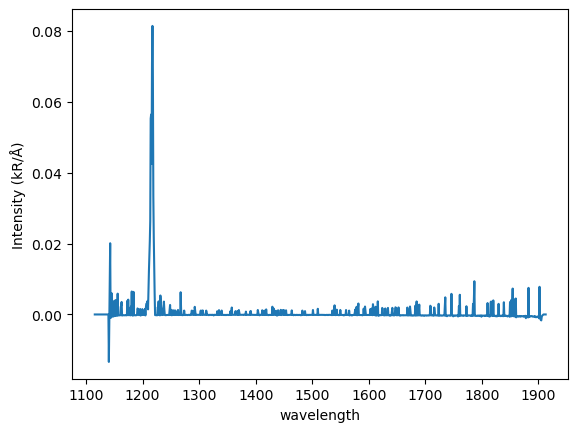

In [11]:
# Let's look at the first sample of the observation and at the begnning of the time period (first time stamp):
sample1 = data[0,1,:,:]
print(sample1.shape)
wavelength = fits_data(10,'wavelength_fuv')

# printing the spectrum for spatial row 32 on the slit
plt.plot(wavelength,sample1[:,32])
plt.xlabel('wavelength')
plt.ylabel('Intensity (kR/Å)')

(1024,)


Text(0, 0.5, 'Intensity (kR/Å)')

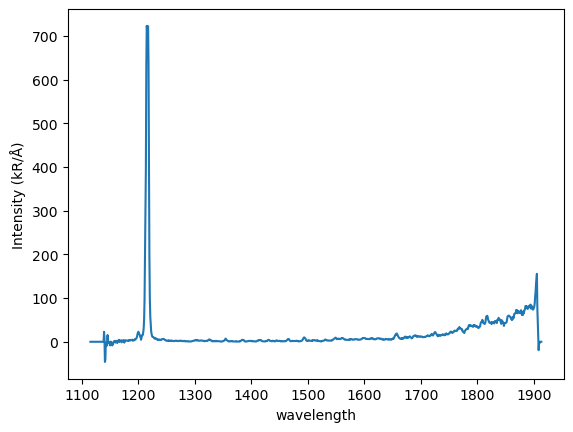

In [12]:
# Graphing the average spectrum over the entire observation:
# - over the three time periods and,
# - over all the samples and,
# - over all the spatial pixels

# Set the -1000 values to zero
index = np.where(data == -1000)
data[index] = 0.0

# Averaging the spectrum acroos the spatial and temporal dimensions
avg_spectrum = np.sum(data, axis=(0,1,3))
print(avg_spectrum.shape)

# This graph corresponds to the information stored in the AveragedSpectra file
plt.plot(wavelength,avg_spectrum)
plt.xlabel('wavelength')
plt.ylabel('Intensity (kR/Å)')

## Displaying detector images
The detcetor images are located in the DETECTOR_IMG_FUV HDU, which contains a set of 7 binary table, each diplaying an image detector at a particular wavelength or wavelength range.

In [13]:
col_name(4)

ColDefs(
    name = 'LYMAN_ALPHA'; format = '64D'; dim = '(64)'
    name = 'LBH_1270_1505A'; format = '64D'; dim = '(64)'
    name = 'N2_LBH_1356A'; format = '64D'; dim = '(64)'
    name = 'LBH_1464A'; format = '64D'; dim = '(64)'
    name = 'NI_1493A'; format = '64D'; dim = '(64)'
    name = 'REFLECTED_SOLAR_1740_1895A'; format = '64D'; dim = '(64)'
    name = 'SUMMED_1100_1900A'; format = '64D'; dim = '(64)'
)

In [14]:
# let's look at the Lyman alpha image
lyman = fits_data(4,'Lyman_alpha')
print(lyman.shape)

(81, 64)


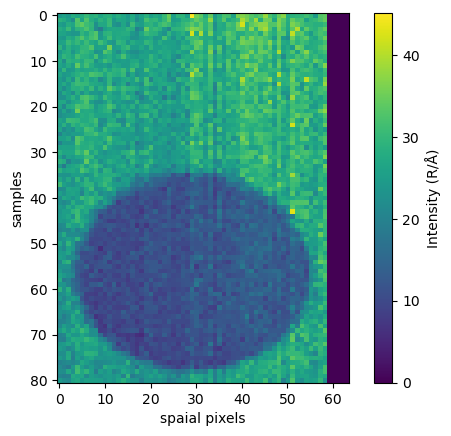

In [15]:
im = plt.imshow(lyman)
plt.xlabel('spaial pixels')
plt.ylabel('samples')

cbar = plt.colorbar(im)
cbar.set_label("Intensity (R/Å)")

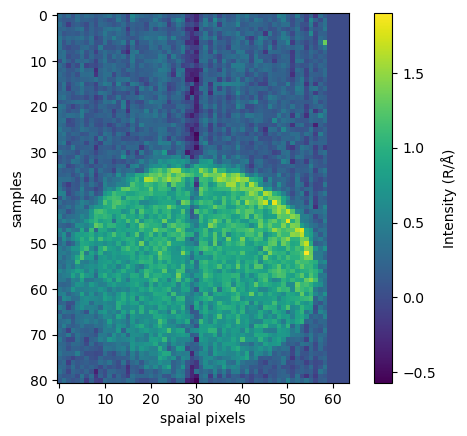

In [16]:
# Displaying the LBH emission band system from 1270 to 1505 Å
lbh = fits_data(4,'LBH_1270_1505A')
im = plt.imshow(lbh)
plt.xlabel('spaial pixels')
plt.ylabel('samples')

cbar = plt.colorbar(im)
cbar.set_label("Intensity (R/Å)")